# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Devyn M. Kimball |
| Creation Date | 5 February 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [2]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Devyn M. kimball"
__contact__   = "Devyn.Kimball@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [3]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [4]:
data = pd.read_csv("KBIS_sounding.csv",delimiter=',',skiprows=1)
print(data)

    pressure[mb]  heigh[m]  temperature[degC]  dewpoint[degC]  u-wind[m/s]  \
0         1000.0     355.0                NaN             NaN          NaN   
1          959.0     649.0              -25.3           -28.8          NaN   
2          949.0     726.0              -24.1           -27.6          NaN   
3          936.0     826.0              -22.7           -28.7          NaN   
4          925.0     915.0              -22.9           -28.9         2.98   
5          898.0    1131.0              -22.9           -28.9          NaN   
6          851.0    1526.0              -21.3           -35.3          NaN   
7          850.0    1536.0              -21.3           -35.3         2.57   
8          763.0    2328.0              -22.5           -40.5          NaN   
9          730.0    2651.0              -24.1           -41.1          NaN   
10         721.0    2741.0              -23.1           -41.1          NaN   
11         707.0    2884.0              -22.9           -41.9   

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [5]:
#grabs the first line which is the title of the data
title = open("../assignment_2/KBIS_sounding.csv",'r').readlines()[0]
print(title)
#grab each variable and add units
pressure = data['pressure[mb]']
pressure = pressure * units('millibar')

height = data['heigh[m]']
height = height * units('meters')

temperature = data['temperature[degC]']
temperature = temperature * units('degC')

dewpoint = data['dewpoint[degC]']
dewpoint = dewpoint * units('degC')

uwind = data['u-wind[m/s]']
uwind = uwind * units('m/s').to (units('knots'))

vwind = data['v-wind[m/s]']
vwind = vwind * units('m/s').to (units('knots'))


KBIS - 2009-01-15 12:00:00



### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

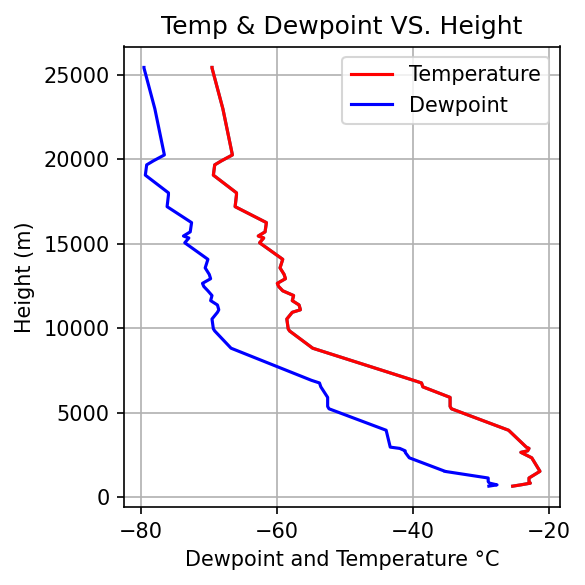

In [6]:
#create a figure (4in x 4in igsize) dpi=150
fig = plt.figure(figsize = (4, 4),dpi=150)
#create subplot
plot1 = plt.subplot(1,1,1)
#plot temperature on the x-axis, height on the y-axis in red
#give it the label of TEMPERATURE
plt.title('Temp & Dewpoint VS. Height') 
plot1.set_ylabel('Height')
plot1.set_xlabel('temperature') 
plt.plot(temperature, height)
plt.plot(temperature,height, color='red',label='Temperature')

#plot dewpoint in blue
#give it the label of DEWPOINT
plot1.set_xlabel('Dewpoint and Teperature')
plt.plot(dewpoint, height, color = 'blue', label = 'Dewpoint')
#add a background grid
plt.grid()
#add a x label with units (including the degree symbol) - google it and figure it out :)
plot1.set_xlabel(u"Dewpoint and Temperature \N{DEGREE SIGN}C")
#add a y label with units 
plot1.set_ylabel("Height (m)")
#add a legend
plt.legend()
#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png')

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

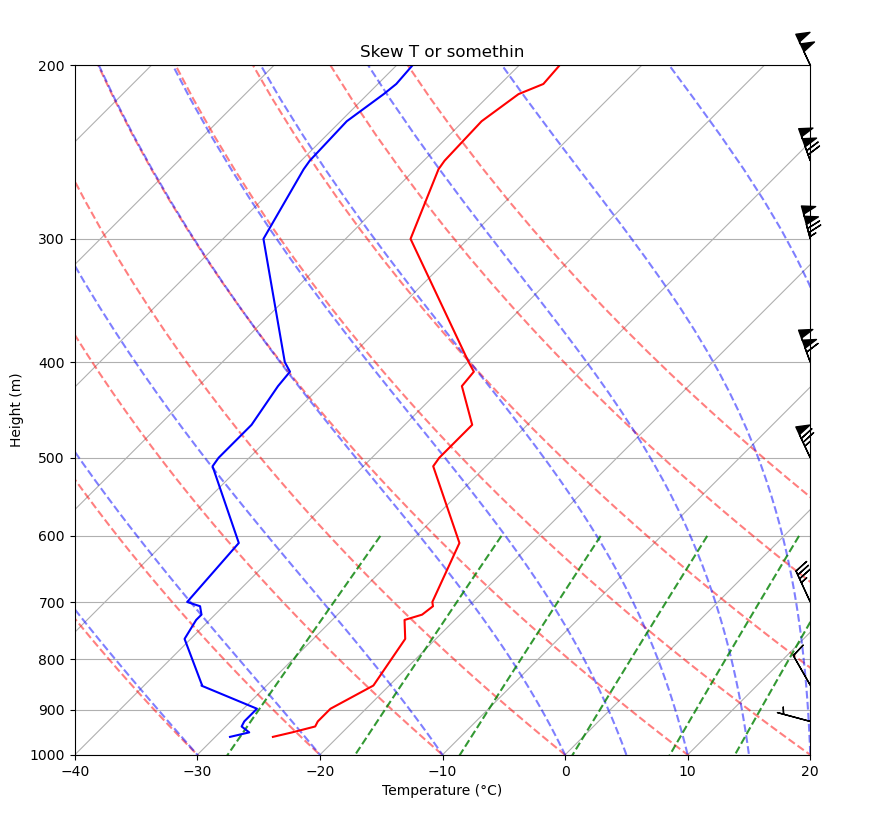

In [7]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = (9, 9),dpi=100)
#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.title('Skew T or somethin')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
#add a y label with units 
plt.ylabel('Height (m)')

#add temperature in red
skew.plot(pressure,temperature, color="red")
#add dewpoint in blue
skew.plot(pressure,dewpoint, color="blue")

#plot wind barbs
skew.plot_barbs(pressure,uwind,vwind)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,20)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000,200)
#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig('skewT.png')

### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

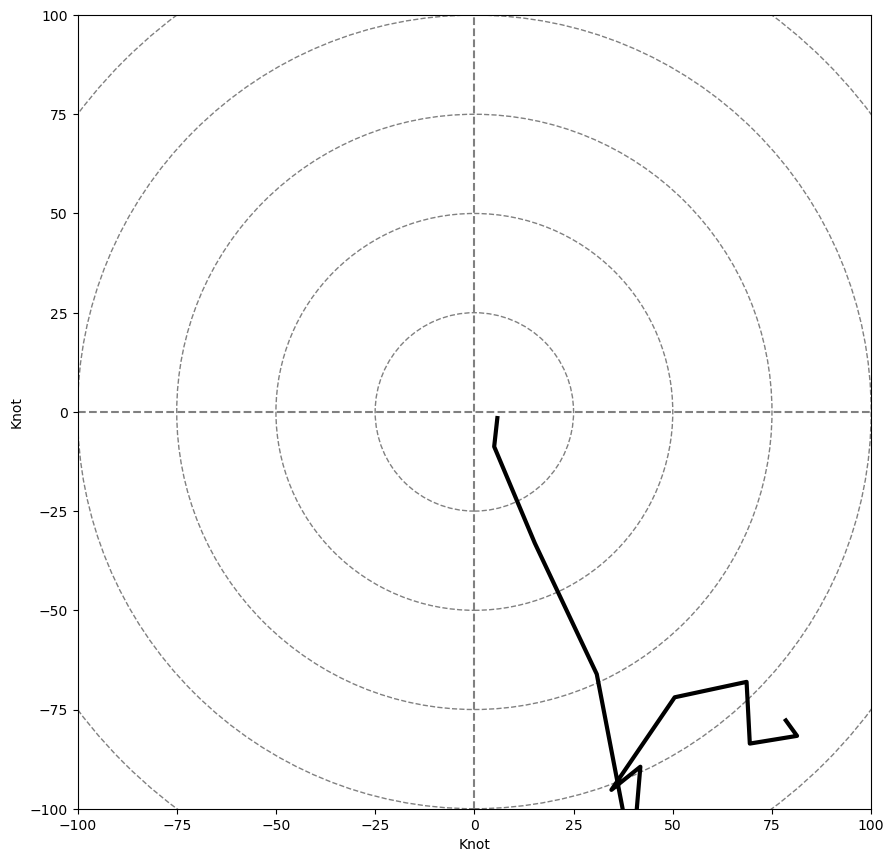

In [8]:
fig = plt.figure(figsize = (9, 9),dpi=100)
#remove nans from u and v
u_hodo = uwind.dropna()
v_hodo = vwind.dropna()

#create the hodograph (have the range from 0-100kts with 25kt increment)
#make the wind curve black
ax = fig.add_subplot(1,1,1)
h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo, color='black')
#add x and y labels
plt.xlabel('Knot')
plt.ylabel('Knot')
#to make sure everything looks okay
fig.tight_layout()

#save figure as hodo.png
plt.savefig('hodo.png')

### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

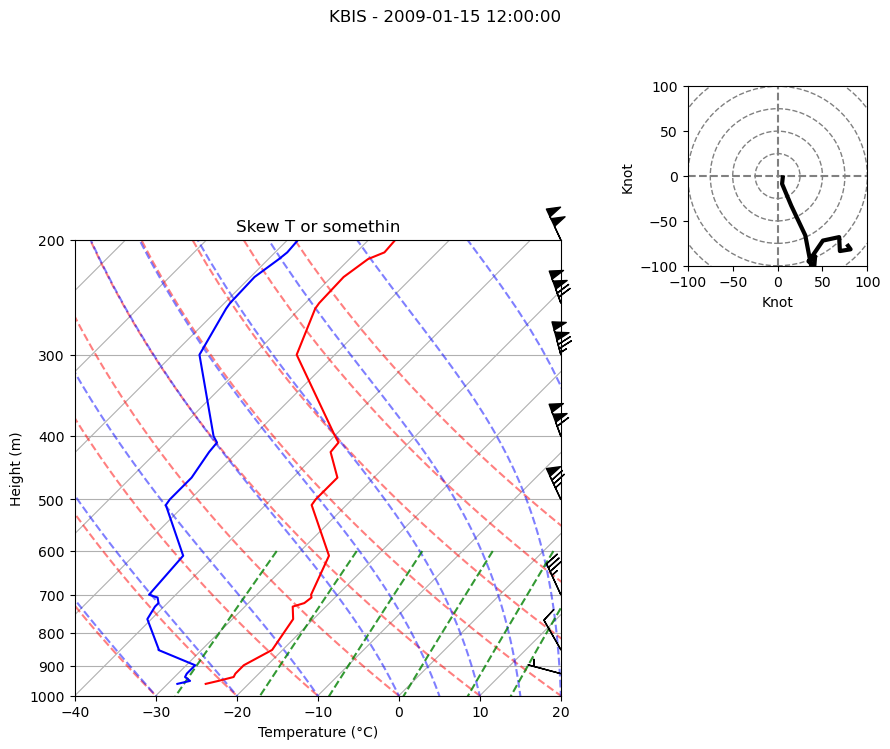

In [15]:
fig = plt.figure(figsize=(9,9),dpi=100)
gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])
#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()
#add axis labels with units
plt.title('Skew T or somethin')
plt.xlabel('Temperature (\N{DEGREE SIGN}C)')
#add a y label with units 
plt.ylabel('Height (m)')
h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo, color='black')
#add temperature in red
skew.plot(pressure,temperature, color="red")
#add dewpoint in blue
skew.plot(pressure,dewpoint, color="blue")
#plot wind barbs
skew.plot_barbs(pressure,uwind,vwind)
#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,20)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000,200)
#add a hodograph
ax = fig.add_subplot(gs[0,-1])
h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(u_hodo, v_hodo, color='black')
#add x and y labels
plt.xlabel('Knot')
plt.ylabel('Knot')
#add a title with the date and launch location:
plt.suptitle(title)
#to make sure everything looks okay
fig.tight_layout()
#save the figure as skew_hodo.png
plt.savefig('skew_hodo.png')